In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
pd.set_option('display.max_columns', None)

In [119]:
df = pd.read_csv('outlier_treated.csv')

In [120]:

df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,flat,experion the heartsong,sector 108,1.60,7988.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3,4,3+,3.0,South,Relatively New,2003.0,1500.29,1140.98,0,1,0,0,0,1,60
1,1,flat,emaar gurgaon greens,sector 102,1.55,9394.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,4,3,7.0,North,Relatively New,1650.0,NaN,1022.58,0,1,0,0,0,1,152
2,2,flat,sobha city,sector 108,3.75,14940.0,2510.0,Super Built up area 2343(217.67 sq.m.),3,3,2,16.0,North-East,New Property,2343.0,NaN,NaN,0,1,0,0,0,0,77
3,3,flat,tulip violet,sector 69,1.28,8112.0,1578.0,Super Built up area 1578(146.6 sq.m.),3,3,2,12.0,South-West,Relatively New,1578.0,NaN,NaN,0,0,0,1,0,1,49
4,4,flat,spaze privy at,sector 84,1.35,9643.0,1400.0,Super Built up area 1918(178.19 sq.m.)Built Up...,3,3,3,7.0,South-East,Relatively New,1918.0,1750.00,1400.00,0,0,0,1,0,0,90


In [121]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1030
agePossession             0
super_built_up_area    1722
built_up_area          1983
carpet_area            1739
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

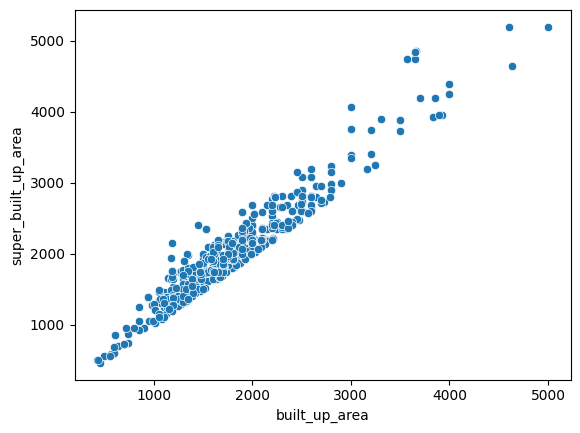

In [122]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

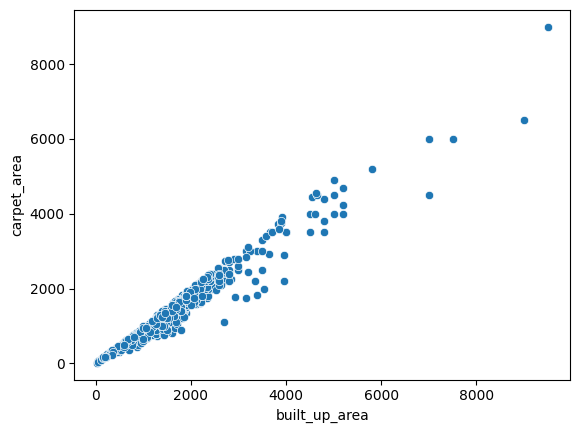

In [123]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [124]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3592    False
3593    False
3594    False
3595    False
3596    False
Length: 3597, dtype: bool

In [125]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [126]:
all_present_df.shape

(531, 24)

In [127]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [128]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [129]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [130]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [131]:
sbc_df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1,1,flat,emaar gurgaon greens,sector 102,1.55,9394.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,4,3,7.0,North,Relatively New,1650.0,NaN,1022.58,0,1,0,0,0,1,152
5,5,flat,imperia the esfera,sector 37c,0.98,5399.0,1815.0,Super Built up area 1815(168.62 sq.m.)Carpet a...,3,4,3,9.0,South-West,Relatively New,1815.0,NaN,1510.00,0,1,0,0,1,0,49
10,10,flat,bestech park view city,sector 48,1.78,10023.0,1776.0,Super Built up area 1776(165 sq.m.)Carpet area...,3,4,2,5.0,NaN,Relatively New,1776.0,NaN,1300.00,1,0,0,1,0,0,53
12,12,flat,sbtl caladium,sector 109,1.80,7073.0,2545.0,Super Built up area 2545(236.44 sq.m.)Carpet a...,3,3,3+,10.0,East,Relatively New,2545.0,NaN,1527.00,0,0,0,0,0,0,174
15,15,flat,puri emerald bay,sector 104,2.55,10408.0,2450.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,4,4,3+,5.0,East,Relatively New,2450.0,NaN,2150.00,0,1,0,0,0,0,49


In [132]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\MI Computer\AppData\Local\Temp\ipykernel_3620\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\MI Computer\AppData\Local\Temp\ipykernel_3620\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [133]:
df.update(sbc_df)

In [134]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1030
agePossession             0
super_built_up_area    1722
built_up_area          1562
carpet_area            1739
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [135]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [136]:
sb_df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2,2,flat,sobha city,sector 108,3.75,14940.0,2510.0,Super Built up area 2343(217.67 sq.m.),3,3,2,16.0,North-East,New Property,2343.00,NaN,NaN,0,1,0,0,0,0,77
3,3,flat,tulip violet,sector 69,1.28,8112.0,1578.0,Super Built up area 1578(146.6 sq.m.),3,3,2,12.0,South-West,Relatively New,1578.00,NaN,NaN,0,0,0,1,0,1,49
7,7,flat,prasha apartments,manesar,0.75,3308.0,2267.0,Super Built up area 2115(196.49 sq.m.),3,3,3+,3.0,West,Moderately Old,2115.00,NaN,NaN,0,1,0,0,0,0,31
18,18,flat,raheja vanya,sector 99a,0.59,3976.0,1484.0,Super Built up area 1252.13(116.33 sq.m.),2,2,3,1.0,East,Under Construction,1252.13,NaN,NaN,0,0,0,0,1,0,96
21,21,flat,bptp terra,sector 37d,1.98,9037.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,12.0,North-East,New Property,2191.00,NaN,NaN,1,0,0,0,0,1,49


In [137]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\MI Computer\AppData\Local\Temp\ipykernel_3620\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\MI Computer\AppData\Local\Temp\ipykernel_3620\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].

In [138]:
df.update(sb_df)

In [139]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1030
agePossession             0
super_built_up_area    1722
built_up_area           687
carpet_area            1739
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [140]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [141]:
c_df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
11,11,flat,the serenas,sector 36,0.42,7910.0,531.0,Carpet area: 531 (49.33 sq.m.),2,2,1,3.0,NaN,Undefined,NaN,NaN,531.0,0,0,0,0,0,0,0
22,22,flat,green court,sector 90,0.47,6812.0,690.0,Carpet area: 690 (64.1 sq.m.),2,2,1,0.0,East,New Property,NaN,NaN,690.0,0,0,0,0,0,0,49
44,44,flat,uphaar residency 2,sector 105,0.42,5600.0,750.0,Carpet area: 750 (69.68 sq.m.),3,2,1,0.0,East,Moderately Old,NaN,NaN,750.0,0,0,0,0,1,0,7
50,50,house,independent,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),3,2,0,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0
62,62,flat,mrg world ultimus,sector 90,0.50,6983.0,716.0,Carpet area: 716 (66.52 sq.m.),2,2,2,1.0,North-East,Under Construction,NaN,NaN,716.0,0,0,0,0,0,0,21


In [142]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\MI Computer\AppData\Local\Temp\ipykernel_3620\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\MI Computer\AppData\Local\Temp\ipykernel_3620\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(

In [143]:
df.update(c_df)

In [144]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1030
agePossession             0
super_built_up_area    1722
built_up_area             0
carpet_area            1739
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

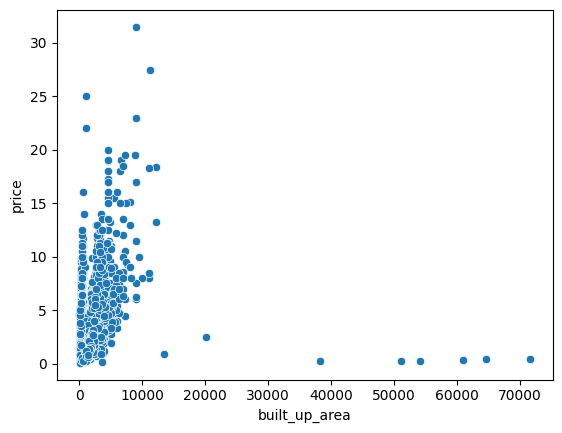

In [145]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [146]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [147]:
anamoly_df.sample(5)

,price,area,built_up_area
516,9.50,4050.0,500.0
707,5.50,3240.0,355.0
1141,3.15,2153.0,222.0
1461,4.20,2125.0,1946.0
975,10.00,4950.0,550.0


In [148]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [149]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

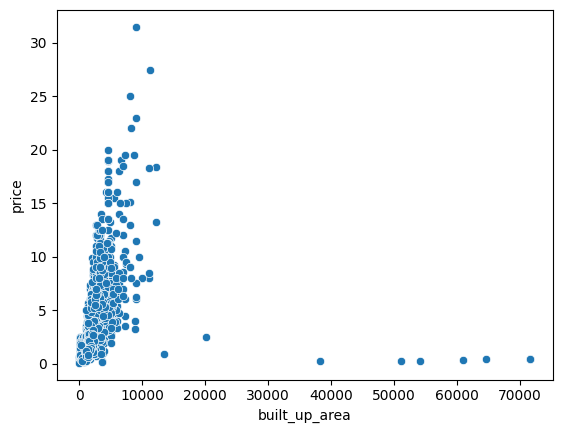

In [150]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [151]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'],inplace=True)

In [152]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,flat,experion the heartsong,sector 108,1.60,7988.0,3,4,3+,3.0,South,Relatively New,1500.29,0,1,0,0,0,1,60
1,1,flat,emaar gurgaon greens,sector 102,1.55,9394.0,3,4,3,7.0,North,Relatively New,1315.00,0,1,0,0,0,1,152
2,2,flat,sobha city,sector 108,3.75,14940.0,3,3,2,16.0,North-East,New Property,2120.00,0,1,0,0,0,0,77
3,3,flat,tulip violet,sector 69,1.28,8112.0,3,3,2,12.0,South-West,Relatively New,1428.00,0,0,0,1,0,1,49
4,4,flat,spaze privy at,sector 84,1.35,9643.0,3,3,3,7.0,South-East,Relatively New,1750.00,0,0,0,1,0,0,90


In [153]:
df.isnull().sum()

Unnamed: 0            0
property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1030
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [154]:
df[df['floorNum'].isnull()]

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
705,722,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,1,114
723,740,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,0,0
853,875,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,0,0
1101,1133,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
1180,1217,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
1710,1773,house,ansal sushant lok,sector 43,10.50,27911.0,4,4,2,NaN,North-East,Old Property,3762.0,0,1,0,0,0,0,59
1852,1927,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
2173,2270,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21
2337,2443,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
2683,2820,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0


In [155]:
df[df['property_type'] == 'house']['floorNum'].median()

np.float64(2.0)

In [156]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\MI Computer\AppData\Local\Temp\ipykernel_3620\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [157]:
df.isnull().sum()

Unnamed: 0            0
property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1030
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [158]:
1011/df.shape[0]

0.2810675562969141

### facing

<Axes: ylabel='count'>

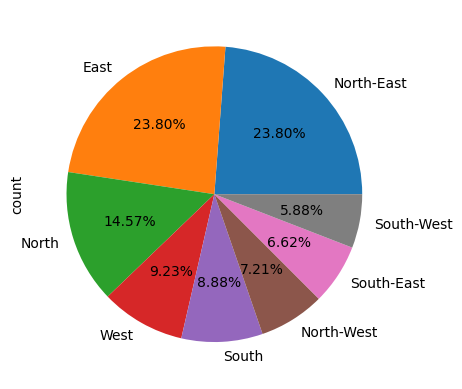

In [159]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [160]:
df.drop(columns=['facing'],inplace=True)

In [161]:
df.sample(5)

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1980,2065,flat,tulip violet,sector 69,1.70,8625.0,4,4,1,12.0,Relatively New,1783.0,0,0,0,0,0,0,88
3398,3588,flat,godrej oasis,sector 88a,1.45,8082.0,3,3,3,12.0,Relatively New,1993.0,0,0,0,0,0,0,49
3488,3683,flat,orris carnation residency,sector 85,0.55,5789.0,2,2,2,5.0,Relatively New,1050.0,0,0,0,0,1,0,174
2259,2360,flat,m3m skywalk,sector 74,1.50,12500.0,2,2,3,17.0,Relatively New,1300.0,0,0,1,0,0,0,174
959,987,flat,puri emerald bay,sector 104,1.59,10905.0,2,2,2,12.0,Relatively New,1403.0,0,0,0,0,0,0,121


In [162]:
df.isnull().sum()

Unnamed: 0         0
property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [163]:
df.drop(index=[2536],inplace=True)

In [164]:
df.isnull().sum()

Unnamed: 0         0
property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [165]:
df['agePossession'].value_counts()

agePossession
Relatively New        1616
New Property           563
Moderately Old         551
Undefined              303
Old Property           298
Under Construction     265
Name: count, dtype: int64

In [166]:
df[df['agePossession'] == 'Undefined']

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
11,11,flat,the serenas,sector 36,0.42,7910.0,2,2,1,3.0,Undefined,590.0,0,0,0,0,0,0,0
23,23,house,independent,sector 5,3.75,11029.0,5,5,3+,3.0,Undefined,3400.0,0,0,0,0,0,0,0
40,40,flat,godrej air,sector 85,1.75,9589.0,3,3,2,27.0,Undefined,1825.0,0,0,0,0,0,0,44
50,50,house,independent,sector 7,0.45,5000.0,3,2,0,1.0,Undefined,1000.0,0,0,0,0,0,0,0
57,57,flat,ansal height 86,sector 86,0.80,5882.0,2,2,0,1.0,Undefined,1360.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,3746,house,independent,sector 3,0.55,7333.0,1,1,0,1.0,Undefined,750.0,0,0,0,0,0,0,0
3578,3781,house,independent,sector 12,1.70,9444.0,3,3,0,1.0,Undefined,200.0,0,0,0,0,0,0,0
3582,3786,house,independent,sector 105,0.74,7400.0,3,3,0,2.0,Undefined,1000.0,0,0,0,0,0,0,0
3586,3791,house,independent,sector 24,10.00,25543.0,8,10,3+,1.0,Undefined,3915.0,0,0,0,0,0,0,0


In [167]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [168]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [169]:
df['agePossession'].value_counts()

agePossession
Relatively New        1734
Moderately Old         599
New Property           593
Old Property           333
Under Construction     279
Undefined               58
Name: count, dtype: int64

In [170]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [171]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [172]:
df['agePossession'].value_counts()

agePossession
Relatively New        1746
Moderately Old         606
New Property           594
Old Property           336
Under Construction     279
Undefined               35
Name: count, dtype: int64

In [173]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [174]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [175]:
df['agePossession'].value_counts()

agePossession
Relatively New        1748
Moderately Old         639
New Property           594
Old Property           336
Under Construction     279
Name: count, dtype: int64

In [176]:
df.isnull().sum()

Unnamed: 0         0
property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [179]:
df.to_csv('gurgaon_missing_value_treated.csv',index=False)

In [178]:
df.shape

(3596, 19)